In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:

file_import = 'Graphite_import_forecasting 2026-27.xlsx'
file_export = 'Graphite_export_forecasting 2026-27.xlsx'


df_imp = pd.read_excel(file_import)

if 'Unnamed: 0' in df_imp.columns:
    df_imp = df_imp.rename(columns={'Unnamed: 0': 'Date'})
if 'Forecasted_Value' in df_imp.columns:
    df_imp = df_imp.rename(columns={'Forecasted_Value': 'Import_Forecast'})
elif 'prediction' in df_imp.columns: # Fallback
    df_imp = df_imp.rename(columns={'prediction': 'Import_Forecast'})

df_imp['Date'] = pd.to_datetime(df_imp['Date'])
df_imp = df_imp.set_index('Date').sort_index()

df_exp = pd.read_excel(file_export,names = ["Export_Forecast"])

if 'Unnamed: 0' in df_exp.columns:
    df_exp = df_exp.rename(columns={'Unnamed: 0': 'Date'})
if 'prediction' in df_exp.columns:
    df_exp = df_exp.rename(columns={'prediction': 'Export_Forecast'})
elif 'Forecasted_Value' in df_exp.columns:
     df_exp = df_exp.rename(columns={'Forecasted_Value': 'Export_Forecast'})

In [ ]:

df_gap = pd.merge(df_imp, df_exp, left_index=True, right_index=True, how='inner')


df_gap['Net_Gap'] = df_gap['Import_Forecast'] - df_gap['Export_Forecast']

total_import = df_gap['Import_Forecast'].sum()
total_export = df_gap['Export_Forecast'].sum()
total_gap = df_gap['Net_Gap'].sum()
avg_monthly_gap = df_gap['Net_Gap'].mean()

In [11]:
print(f"Total Import Forecast: ${total_import:,.2f} M")
print(f"Total Export Forecast: ${total_export:,.2f} M")
print(f"Cumulative Deficit (Gap): ${total_gap:,.2f} M")
print(f"Average Monthly Deficit: ${avg_monthly_gap:,.2f} M")

Total Import Forecast: $90.92 M
Total Export Forecast: $178.51 M
Cumulative Deficit (Gap): $-87.59 M
Average Monthly Deficit: $-3.65 M


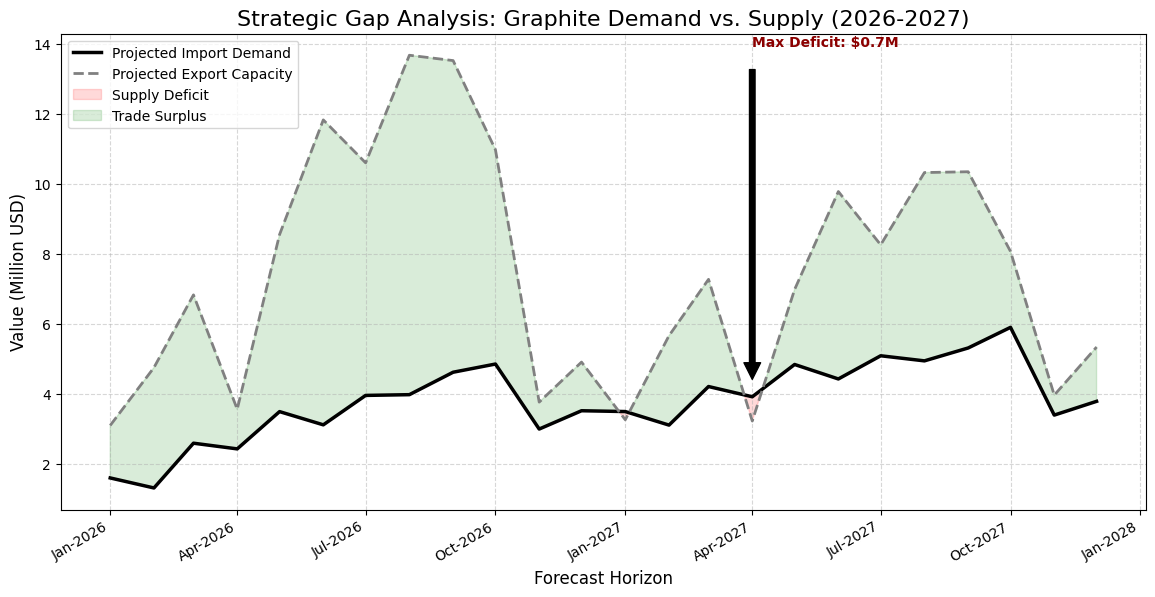

In [ ]:

plt.figure(figsize=(14, 7))


plt.plot(df_gap.index, df_gap['Import_Forecast'], label='Projected Import Demand', color='black', linewidth=2.5)
plt.plot(df_gap.index, df_gap['Export_Forecast'], label='Projected Export Capacity', color='gray', linewidth=2, linestyle='--')

# Fill the Gap
# Red for Deficit (Import > Export)
plt.fill_between(df_gap.index, df_gap['Import_Forecast'], df_gap['Export_Forecast'],
                 where=(df_gap['Import_Forecast'] > df_gap['Export_Forecast']),
                 interpolate=True, color='red', alpha=0.15, label='Supply Deficit')

# Green for Surplus 
plt.fill_between(df_gap.index, df_gap['Import_Forecast'], df_gap['Export_Forecast'],
                 where=(df_gap['Import_Forecast'] <= df_gap['Export_Forecast']),
                 interpolate=True, color='green', alpha=0.15, label='Trade Surplus')

# Aesthetics
plt.title('Strategic Gap Analysis: Graphite Demand vs. Supply (2026-2027)', fontsize=16)
plt.ylabel('Value (Million USD)', fontsize=12)
plt.xlabel('Forecast Horizon', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

# Annotate Max Gap
max_gap_date = df_gap['Net_Gap'].idxmax()
max_gap_val = df_gap['Net_Gap'].max()
plt.annotate(f'Max Deficit: ${max_gap_val:.1f}M',
             xy=(max_gap_date, df_gap.loc[max_gap_date, 'Import_Forecast']),
             xytext=(max_gap_date, df_gap.loc[max_gap_date, 'Import_Forecast'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, fontweight='bold', color='darkred')

# Format Dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gcf().autofmt_xdate()

# Save
# plt.savefig('Graphite_Gap_Analysis_2026_27.png')
plt.show()